<a href="https://www.kaggle.com/code/shivangi2k18/behaviour?scriptVersionId=250173832" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/behaviour-ds/train.csv
/kaggle/input/behaviour-ds/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/behaviour-ds/train.csv')

In [3]:
test_df=pd.read_csv('/kaggle/input/behaviour-ds/test.csv')

In [4]:
print(df.head())

   id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0   0               0.0         No                      6.0            4.0   
1   1               1.0         No                      7.0            3.0   
2   2               6.0        Yes                      1.0            0.0   
3   3               3.0         No                      7.0            3.0   
4   4               1.0         No                      4.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 15.0             5.0   Extrovert  
1                        No                 10.0             8.0   Extrovert  
2                       NaN                  3.0             0.0   Introvert  
3                        No                 11.0             5.0   Extrovert  
4                        No                 13.0             NaN   Extrovert  


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [5]:
df['Has_StageFear']=df['Stage_fear'].map({"Yes":1,"No":0})
df['Is_SocDrained']=df['Drained_after_socializing'].map({"Yes":1,"No":0})
df['EIPersonality']=df['Personality'].map({"Extrovert":1,"Introvert":0})

In [6]:
test_df['Has_StageFear']=test_df['Stage_fear'].map({"Yes":1,"No":0})
test_df['Is_SocDrained']=test_df['Drained_after_socializing'].map({"Yes":1,"No":0})
#test_df['EIPersonality']=test_df['Personality'].map({"Extrovert":1,"Introvert":0})

In [7]:
print(df.head())

   id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0   0               0.0         No                      6.0            4.0   
1   1               1.0         No                      7.0            3.0   
2   2               6.0        Yes                      1.0            0.0   
3   3               3.0         No                      7.0            3.0   
4   4               1.0         No                      4.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  \
0                        No                 15.0             5.0   Extrovert   
1                        No                 10.0             8.0   Extrovert   
2                       NaN                  3.0             0.0   Introvert   
3                        No                 11.0             5.0   Extrovert   
4                        No                 13.0             NaN   Extrovert   

   Has_StageFear  Is_SocDrained  EIPersonality  
0

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [8]:
columns_to_drop=['Stage_fear','Drained_after_socializing','Personality','id']
df.drop(columns=columns_to_drop,axis=1,inplace=True)

In [9]:
columns_to_drop=['Stage_fear','Drained_after_socializing']
test_df.drop(columns=columns_to_drop,axis=1,inplace=True)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time_spent_Alone         17334 non-null  float64
 1   Social_event_attendance  17344 non-null  float64
 2   Going_outside            17058 non-null  float64
 3   Friends_circle_size      17470 non-null  float64
 4   Post_frequency           17260 non-null  float64
 5   Has_StageFear            16631 non-null  float64
 6   Is_SocDrained            17375 non-null  float64
 7   EIPersonality            18524 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.1 MB


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Columns
num_cols = [ 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside','Friends_circle_size', 'Post_frequency']  # e.g., continuous
bin_cols = ['Has_StageFear', 'Is_SocDrained']     # binary (0/1)

# Imputers
num_imputer = SimpleImputer(strategy='mean')
bin_imputer = SimpleImputer(strategy='most_frequent')

# Transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_imputer, num_cols),
    ('bin', bin_imputer, bin_cols)
])

X_transformed = preprocessor.fit_transform(df[num_cols + bin_cols])


In [12]:
test_X_transformed=preprocessor.fit_transform(test_df[num_cols + bin_cols])

In [13]:
print(df.head())

   Time_spent_Alone  Social_event_attendance  Going_outside  \
0               0.0                      6.0            4.0   
1               1.0                      7.0            3.0   
2               6.0                      1.0            0.0   
3               3.0                      7.0            3.0   
4               1.0                      4.0            4.0   

   Friends_circle_size  Post_frequency  Has_StageFear  Is_SocDrained  \
0                 15.0             5.0            0.0            0.0   
1                 10.0             8.0            0.0            0.0   
2                  3.0             0.0            1.0            NaN   
3                 11.0             5.0            0.0            0.0   
4                 13.0             NaN            0.0            0.0   

   EIPersonality  
0              1  
1              1  
2              0  
3              1  
4              1  


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [14]:
X_df =  pd.DataFrame(X_transformed, columns=num_cols+bin_cols,index=df.index)
X_df['EIPersonality'] = df['EIPersonality']
df=X_df

In [15]:
X_test_df= pd.DataFrame(test_X_transformed, columns=num_cols+bin_cols, index=test_df.index )
X_test_df['id'] = test_df['id'].values
test_df=X_test_df

In [16]:
test_df.isnull().sum()

Time_spent_Alone           0
Social_event_attendance    0
Going_outside              0
Friends_circle_size        0
Post_frequency             0
Has_StageFear              0
Is_SocDrained              0
id                         0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time_spent_Alone         18524 non-null  float64
 1   Social_event_attendance  18524 non-null  float64
 2   Going_outside            18524 non-null  float64
 3   Friends_circle_size      18524 non-null  float64
 4   Post_frequency           18524 non-null  float64
 5   Has_StageFear            18524 non-null  float64
 6   Is_SocDrained            18524 non-null  float64
 7   EIPersonality            18524 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.1 MB


In [18]:
corr_matrix=df.corr(numeric_only=True)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

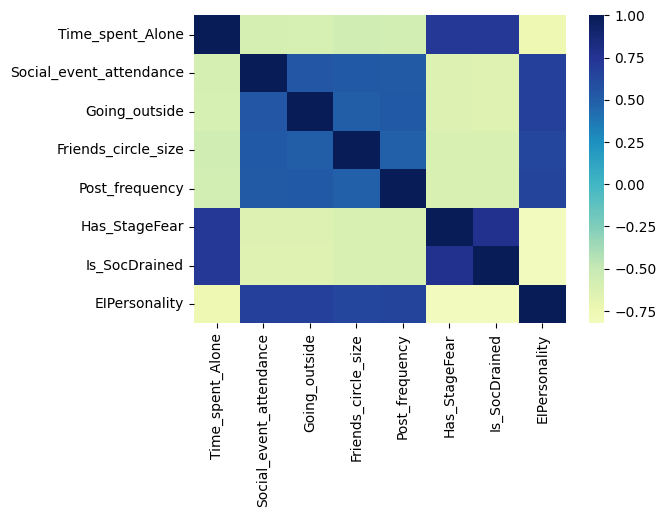

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix,cmap="YlGnBu",fmt=".2f",center=0)

In [20]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Has_StageFear,Is_SocDrained,EIPersonality
count,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097,0.217124,0.219283,0.739527
std,2.905696,2.664215,1.979276,4.101561,2.779168,0.412299,0.413772,0.438905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000,0.000000,0.000000,0.000000
50%,3.000000,5.265106,4.000000,8.000000,5.000000,0.000000,0.000000,1.000000
75%,4.000000,7.000000,6.000000,11.000000,7.000000,0.000000,0.000000,1.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

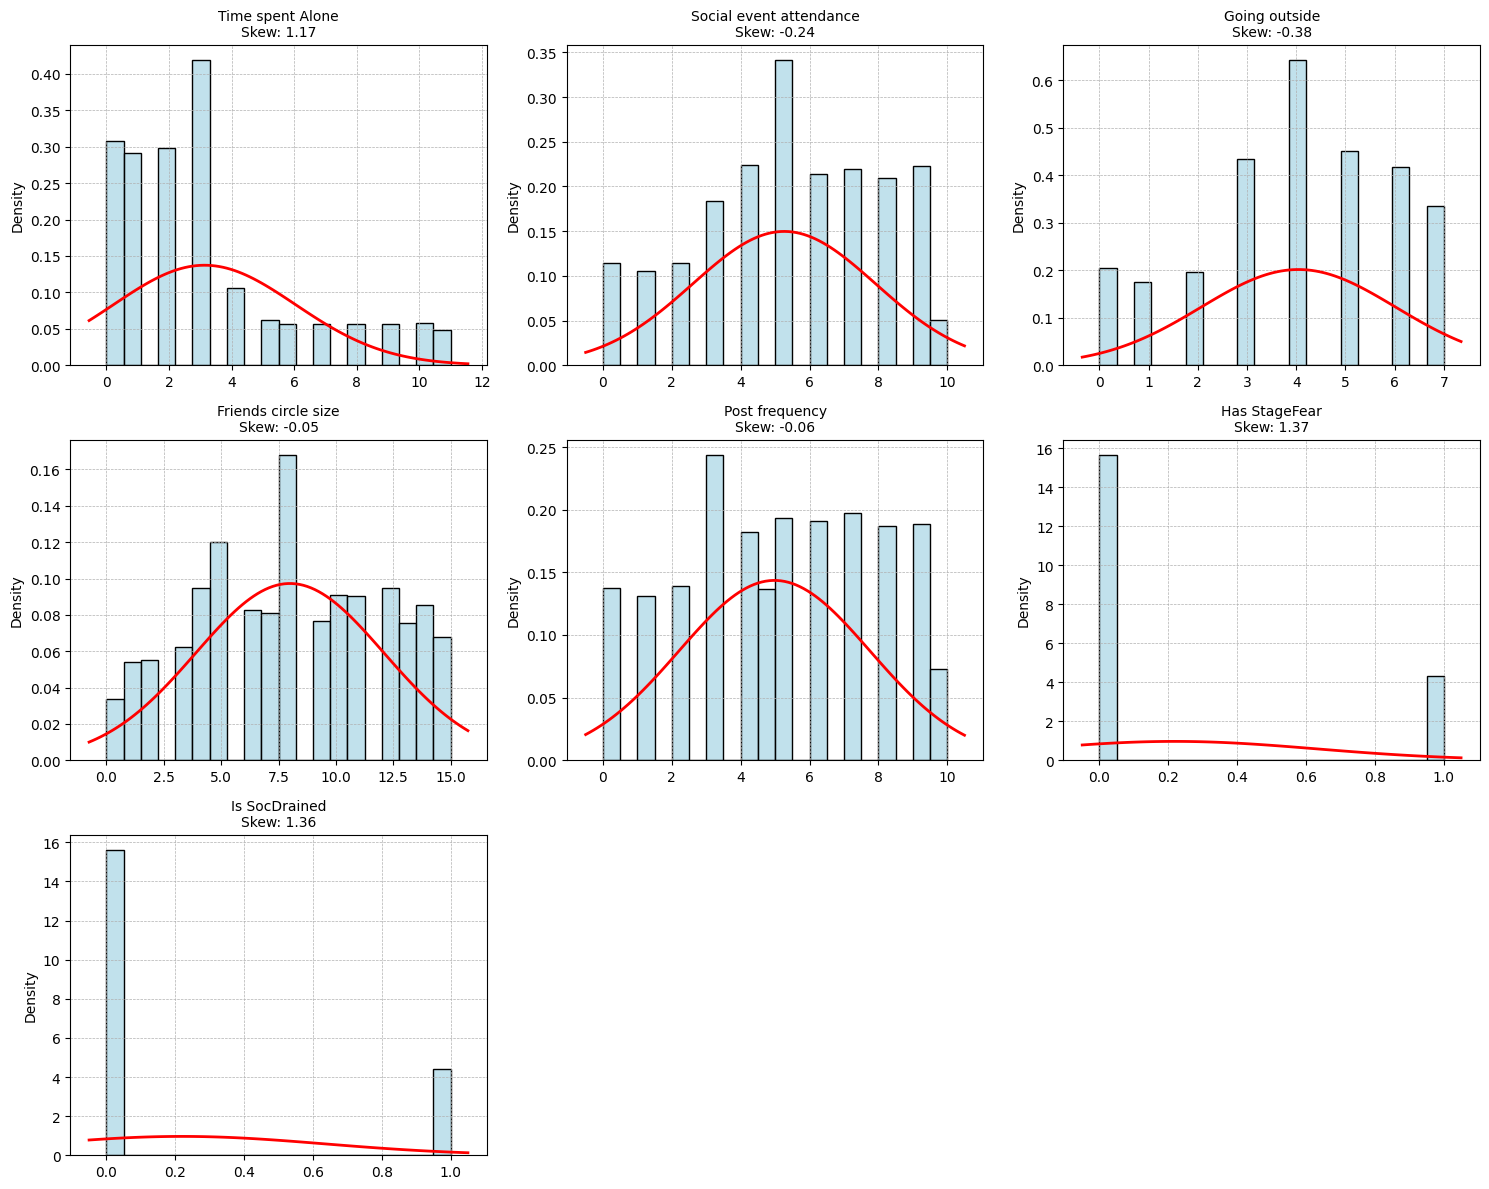

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Columns to analyze
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency', 'Has_StageFear', 'Is_SocDrained']

# Create grid
import math
cols = 3
rows = math.ceil(len(num_cols) / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)

    # Actual data distribution
    sns.histplot(df[col], bins=20, kde=False, stat='density', color='lightblue', edgecolor='black')

    # Normal distribution curve
    mu, std = df[col].mean(), df[col].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2)

    # Title and formatting
    plt.title(f'{col.replace("_", " ")}\nSkew: {df[col].skew():.2f}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [22]:
from scipy.stats import kurtosis

num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency', 'Has_StageFear', 'Is_SocDrained']

# Calculate kurtosis (normal kurtosis is 3 → mesokurtic)
for col in num_cols:
    k = kurtosis(df[col], fisher=False)  # fisher=False to get actual kurtosis
    print(f"{col:25s} → Kurtosis: {k:.2f}")


Time_spent_Alone          → Kurtosis: 3.58
Social_event_attendance   → Kurtosis: 2.22
Going_outside             → Kurtosis: 2.41
Friends_circle_size       → Kurtosis: 2.04
Post_frequency            → Kurtosis: 2.07
Has_StageFear             → Kurtosis: 2.88
Is_SocDrained             → Kurtosis: 2.84


In [23]:
from sklearn.model_selection import train_test_split
X=df.drop('EIPersonality',axis=1)
y= df['EIPersonality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 885   67]
 [  52 2701]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       952
           1       0.98      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [25]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 824  128]
 [ 141 2612]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       952
           1       0.95      0.95      0.95      2753

    accuracy                           0.93      3705
   macro avg       0.90      0.91      0.91      3705
weighted avg       0.93      0.93      0.93      3705



In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc',    SVC(kernel='rbf', probability=True, random_state=42))
])

svc_pipe.fit(X_train, y_train)
print(svc_pipe.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9686909581646423
[[ 824  128]
 [ 141 2612]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       952
           1       0.95      0.95      0.95      2753

    accuracy                           0.93      3705
   macro avg       0.90      0.91      0.91      3705
weighted avg       0.93      0.93      0.93      3705



In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 885   67]
 [  50 2703]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       952
           1       0.98      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ─────────────────────────────
# 1. Load data
# ─────────────────────────────
train_df = pd.read_csv("/kaggle/input/behaviour-ds/train.csv")
test_df_full = pd.read_csv("/kaggle/input/behaviour-ds/test.csv")

# ─────────────────────────────
# 2. Preprocess (map string columns)
# ─────────────────────────────
def preprocess(df):
    df['Has_StageFear'] = df['Stage_fear'].map({"Yes": 1, "No": 0})
    df['Is_SocDrained'] = df['Drained_after_socializing'].map({"Yes": 1, "No": 0})
    return df

train_df = preprocess(train_df)
test_df_full = preprocess(test_df_full)

# Map target only in train set
train_df['EIPersonality'] = train_df['Personality'].map({"Extrovert": 1, "Introvert": 0})

# ─────────────────────────────
# 3. Define features and target
# ─────────────────────────────
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency']
bin_cols = ['Has_StageFear', 'Is_SocDrained']
feature_cols = num_cols + bin_cols

X = train_df[feature_cols]
y = train_df['EIPersonality']

# ─────────────────────────────
# 4. Split data (for internal validation)
# ─────────────────────────────
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ─────────────────────────────
# 5. Impute missing values
# ─────────────────────────────
num_imputer = SimpleImputer(strategy='mean')
bin_imputer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer([
    ('num', num_imputer, num_cols),
    ('bin', bin_imputer, bin_cols)
])

X_train_t = preprocessor.fit_transform(X_train)
X_val_t = preprocessor.transform(X_val)

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

# Define the base model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Define hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'min_child_weight': randint(1, 10)
}

# Set up the search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,               # Try 50 combinations
    cv=3,                    # 3-fold cross-validation
    scoring='f1',            # Use 'f1' for balanced classes
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Run the search on the training data
random_search.fit(X_train_t, y_train)

# Best model
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate on validation set
y_val_pred = best_model.predict(X_val_t)
from sklearn.metrics import classification_report, confusion_matrix
y_val_pred = model.predict(X_val_t)
print("Tuned Model Validation Report:\n", classification_report(y_val, y_val_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'colsample_bytree': 0.786239207252984, 'gamma': 2.713223173537883, 'learning_rate': 0.09596237563848531, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 98, 'subsample': 0.6149392754996857}
Tuned Model Validation Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       965
           1       0.98      0.99      0.99      2740

    accuracy                           0.98      3705
   macro avg       0.98      0.97      0.98      3705
weighted avg       0.98      0.98      0.98      3705



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring=make_scorer(f1_score))
print("Mean CV F1:", cv_scores.mean())


Mean CV F1: 0.9781085157012687


In [31]:
print(test_df.columns)

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency', 'Has_StageFear',
       'Is_SocDrained', 'id'],
      dtype='object')


In [32]:
print(len(y_pred))           # should be 6175
print(test_df.shape[0])    # should also be 6175


3705
6175


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ─────────────────────────────
# 1. Load data
# ─────────────────────────────
train_df = pd.read_csv("/kaggle/input/behaviour-ds/train.csv")
test_df_full = pd.read_csv("/kaggle/input/behaviour-ds/test.csv")

# ─────────────────────────────
# 2. Preprocess (map string columns)
# ─────────────────────────────
def preprocess(df):
    df['Has_StageFear'] = df['Stage_fear'].map({"Yes": 1, "No": 0})
    df['Is_SocDrained'] = df['Drained_after_socializing'].map({"Yes": 1, "No": 0})
    return df

train_df = preprocess(train_df)
test_df_full = preprocess(test_df_full)

# Map target only in train set
train_df['EIPersonality'] = train_df['Personality'].map({"Extrovert": 1, "Introvert": 0})

# ─────────────────────────────
# 3. Define features and target
# ─────────────────────────────
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency']
bin_cols = ['Has_StageFear', 'Is_SocDrained']
feature_cols = num_cols + bin_cols

X = train_df[feature_cols]
y = train_df['EIPersonality']

# ─────────────────────────────
# 4. Split data (for internal validation)
# ─────────────────────────────
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ─────────────────────────────
# 5. Impute missing values
# ─────────────────────────────
num_imputer = SimpleImputer(strategy='mean')
bin_imputer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer([
    ('num', num_imputer, num_cols),
    ('bin', bin_imputer, bin_cols)
])

X_train_t = preprocessor.fit_transform(X_train)
X_val_t = preprocessor.transform(X_val)

# ─────────────────────────────
# 6. Train XGBoost
# ─────────────────────────────
model = XGBClassifier( n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
   # colsample_bytree=0.786239207252984,
   # gamma=2.713223173537883,
   # learning_rate=0.09596237563848531,
   # max_depth=4,
  ##  n_estimators=98,
  #  subsample=0.6149392754996857,
   # use_label_encoder=False,
   # eval_metric='logloss',
   # random_state=42
)

model.fit(X_train_t, y_train)

# ─────────────────────────────
# 7. Evaluate on validation set
# ─────────────────────────────
y_val_pred = model.predict(X_val_t)
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# ─────────────────────────────
# 8. Predict on test.csv
# ─────────────────────────────
X_test_t = preprocessor.transform(test_df_full[feature_cols])
test_pred = model.predict(X_test_t)

# ─────────────────────────────
# 9. Map predictions back to string labels
# ─────────────────────────────
personality_labels = {1: 'Extrovert', 0: 'Introvert'}
personality_pred = pd.Series(test_pred).map(personality_labels)

# ─────────────────────────────
# 10. Create submission.csv
# ─────────────────────────────
submission = pd.DataFrame({
    'id': test_df_full['id'],              # Replace with your actual ID column name if different
    'Personality': personality_pred
})

submission.to_csv('submission.csv', index=False)
print("✅ submission.csv created with", len(submission), "rows")


Validation Confusion Matrix:
 [[ 891   74]
 [  56 2684]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       965
           1       0.97      0.98      0.98      2740

    accuracy                           0.96      3705
   macro avg       0.96      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705

✅ submission.csv created with 6175 rows
